Load given weights and test our model on test images set

In [1]:
import torch
if torch.cuda.is_available():
    torch.device('cuda')
    print("Using cuda")
else:
    torch.device('cpu')
    print("Using cpu")

Using cuda


In [2]:
!nvidia-smi

Wed Jun 12 00:25:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   35C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#uncomment this line if you need to install yolo
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()
!yolo checks
#yolo version should be Yolov8.0.196 when this line is run

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.0/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 52.96 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

Download dataset and model

Original 20 image version:

In [1]:
#!pip install roboflow
#!pip install ultralytics==8.0.196

#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace("basketballsmartref").project("ece285_project")
#version = project.version(1)
#dataset = version.download("yolov8")

Clean Human Faces Dataset with 1480 images in total

if running on google colab, it will ask you to restart the session: DO NOT RESTART THE SESSION

In [7]:
from IPython import display
!pip install roboflow
!pip install ultralytics==8.0.196 #ensure correct version for roboflow
display.clear_output()
print("Install sucessfull")

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY HERE")
project = rf.workspace("basketballsmartref").project("ece285_project")
version = project.version(2)
dataset = version.download("yolov8")


Install sucessfull
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ece285_project-2 in yolov8:: 100%|██████████| 2988/2988 [00:00<00:00, 8016.89it/s]


Use given weights on the Test set of images

Use given weights on source input image folder
 -update path to weights before running, upload weights if necessary or get from training

Switch input folder from cleaned human faces to non-human faces to see confidence drop. Note, each run changes the rows array.


In [6]:
!pip install inference
!pip install supervision
!pip install roboflow
!pip install ultralytics==8.0.196 #ensure correct version for roboflow
from ultralytics import YOLO
from IPython import display
#from IPython.display import display, Image
display.clear_output()
print("Install Sucessful")

Install Sucessful


Single Image Inference Example

Upload weights from training before running


image 1/1 /content/non_human_face_1150.jpg: 640x640 (no detections), 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Reading results
done reading


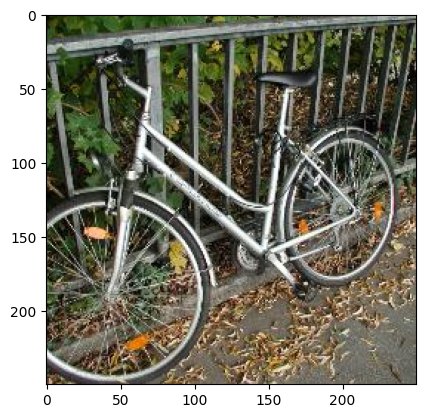

In [144]:
from roboflow import Roboflow
import supervision as sv
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO('/content/best.pt')
human_face = "/content/human_face_1229.jpg"
non_human = "/content/non_human_face_1150.jpg"
results = model(non_human)

# Extract confidence scores and other details
print("Reading results")
for result in results:
    boxes = result.boxes
    for box in boxes:
        confidence = box.conf
        cls = box.cls
        label = result.names[int(cls)]
        #print(f"Label: {label}, Confidence: {confidence:.2f}")
        print("label: ", label)
        print("confidence: ",confidence.item())
print("done reading")


#print(result[0])
image = cv2.imread(non_human)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)


Input folder test

Must upload weights from training before running

In [13]:
#unzip input image folder (after upload, for google colab)
!unzip -q cleaned_human_faces.zip -d /content/cleaned_human_faces

In [7]:
#unzip input image folder (after upload, for google colab)
!unzip -q cleaned_non_human_faces.zip -d /content/cleaned_non_human_faces

In [103]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.01.zip -d /content/adversarial_images_0.01

In [114]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.03.zip -d /content/adversarial_images_0.03

In [125]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.06.zip -d /content/adversarial_images_0.06

In [135]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.09.zip -d /content/adversarial_images_0.09

In [151]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.13.zip -d /content/adversarial_images_0.13

In [1]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.16.zip -d /content/adversarial_images_0.16

In [19]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.2.zip -d /content/adversarial_images_0.2

In [26]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.25.zip -d /content/adversarial_images_0.25

In [34]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.3.zip -d /content/adversarial_images_0.3

In [41]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.35.zip -d /content/adversarial_images_0.35

In [47]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.4.zip -d /content/adversarial_images_0.4

In [53]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.45.zip -d /content/adversarial_images_0.45

In [60]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.5.zip -d /content/adversarial_images_0.5

In [65]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.6.zip -d /content/adversarial_images_0.6

In [71]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.8.zip -d /content/adversarial_images_0.8

In [76]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_0.95.zip -d /content/adversarial_images_0.95

In [82]:
#unzip input image folder (after upload, for google colab)
!unzip -q adversarial_images_1.0.zip -d /content/adversarial_images_1.0

In [9]:
from roboflow import Roboflow
import supervision as sv
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import pandas as pd
from IPython import display

model = YOLO('/content/best.pt')

#path to input image folder
input_image_path = "/content/cleaned_non_human_faces/temp_non_human_faces"

#create output folder, change name before run for new folder
output_image_path = '/content/non_human_faces_output'
os.makedirs(output_image_path,exist_ok=True)

#initialize pandas Dataframe
#df = pd.DataFrame(columns=['image_filename','label','confidence'])
rows=[]
total_images = 0
total_faces_count = 0

#process each image in folder
for image_filename in os.listdir(input_image_path):
  image_path = os.path.join(input_image_path, image_filename)

  if os.path.isfile(image_path) and image_path.endswith(('.png','.jpg','.jpeg')):
    total_images += 1
    #result = model.predict(image_path, confidence=20, overlap=30).json()
    #print(result)

    results = model(image_path)
    image = cv2.imread(image_path)

    best_prediction = None
    highest_confidence = 0

    #predictions = []

    for result in results:
      boxes = result.boxes
      for box in boxes:
          confidence = box.conf
          label = result.names[int(box.cls)]
          #if label == 'faces':
          #  total_faces_count += 1
          #predictions.append({
          #      'image_filename': image_filename,
          #      'label': result.names[int(box.cls)],
          #      'confidence': confidence.item()
          #})
          if confidence >= highest_confidence:
            highest_confidence = confidence
            best_prediction = {
                'image_filename': image_filename,
                'label': result.names[int(box.cls)],
                'confidence': confidence.item()
           }


    if best_prediction: #predictions:
      rows.append(best_prediction)
      #rows.extend(predictions)

      annotated = result.plot() #plots all detections
    else:
      rows.append({
        'image_filename': image_filename,
        'label': "no_face",
        'confidence': 0
      })
      annotated = image #original image if nothing detected
    #save annotated image
    output_image_path_curr = os.path.join(output_image_path,image_filename)
    cv2.imwrite(output_image_path_curr,annotated)

    #rows.append({
    #    'image_filename': image_filename,
    #    'label': label,
    #    'confidence': confidence
    #})


display.clear_output()
print("Output images saved in:", output_image_path)

#create DataFrame from rows
df = pd.DataFrame(rows)

#show Dataframe
from IPython.display import display, Image #must import it this way here for now, idk why
print("Output Dataframe")
display(df)


Output images saved in: /content/non_human_faces_output
Output Dataframe


,image_filename,label,confidence
0,non_human_face_522.jpg,faces,0.462868
1,non_human_face_165.jpg,no_face,0.000000
2,non_human_face_718.jpg,no_face,0.000000
3,non_human_face_1042.jpg,no_face,0.000000
4,non_human_face_441.jpg,no_face,0.000000
...,...,...,...
1312,non_human_face_388.jpg,no_face,0.000000
1313,non_human_face_1311.jpg,no_face,0.000000
1314,non_human_face_294.jpg,faces,0.503481
1315,non_human_face_389.jpg,faces,0.370754


In [10]:
#print(total_faces_count)
print(total_images)
print(len(rows))

1317
1317


In [94]:
# @title Cleaned Human Faces


cleaned_faces_all = rows
print(len(cleaned_faces_all))

cleaned_faces_conf = []
high_conf_count = 0
faces_count = 0
no_face_count = 0

for result in rows:
  confidence = result['confidence']
  cleaned_faces_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'faces':
    faces_count += 1
  if label == 'no_face':
    no_face_count += 1



cleaned_faces_conf_avg = sum(cleaned_faces_conf) / len(cleaned_faces_conf)
cleaned_accuracy = faces_count / total_images

print("Total number of images in folder: ", total_images)
print("Number of images with detected faces: ", faces_count)
print("Number of images with no detection: ", no_face_count)
#print("Number of detected faces: ", faces_count)
print("average cleaned-human-faces confidence:  ", cleaned_faces_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Cleaned Images Accuracy: ",cleaned_accuracy )



Total number of images in folder:  1468
Number of images with detected faces:  1468
Number of images with no detection:  0
average cleaned-human-faces confidence:   0.8833914557497248
Number of images with detected faces with confidence > 0.7:   1464
Cleaned Images Accuracy:  1.0
1468


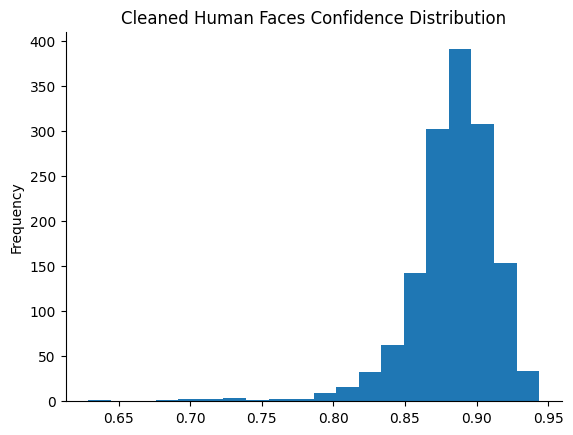

In [113]:
#EXAMPLE GRAPH FOR CLEANED CONFIDENCE, NOT FINAL
#create DataFrame from rows
df = pd.DataFrame(cleaned_faces_all)

from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Cleaned Human Faces Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# @title Cleaned Non-Human Faces

cleaned_non_faces_all = rows
print(len(cleaned_non_faces_all))

cleaned_non_faces_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in rows:
  confidence = result['confidence']
  cleaned_non_faces_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


cleaned_non_faces_conf_avg = sum(cleaned_non_faces_conf) / len(cleaned_non_faces_conf)
cleaned_non_accuracy = no_faces_count / total_images

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("average cleaned-non-human-faces confidence:  ", cleaned_non_faces_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Cleaned Non-face Images Accuracy: ",cleaned_non_accuracy )

1317
Total number of images in folder:  1317
Number of images with faces detected:  123
Number of images without faces detected:  1194
average cleaned-non-human-faces confidence:   0.04197597035242919
Number of images with detected faces with confidence > 0.7:   14
Cleaned Non-face Images Accuracy:  0.9066059225512528


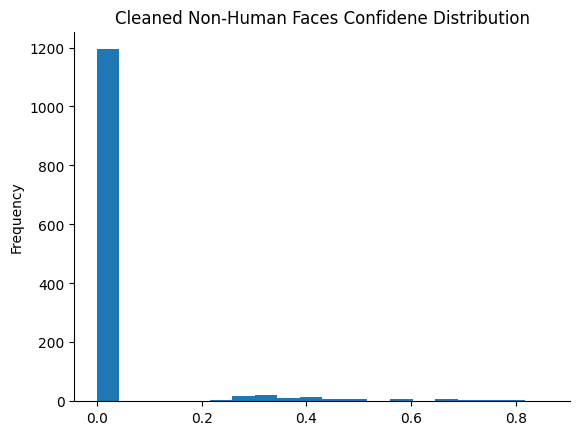

In [112]:
#create DataFrame from rows
df = pd.DataFrame(cleaned_non_faces_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Cleaned Non-Human Faces Confidene Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
# @title Adversarial Images 0.01

adversarial_0_01_all = rows
print(len(adversarial_0_01_all))

adversarial_0_01_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in rows:
  confidence = result['confidence']
  adversarial_0_01_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_01_conf_avg = sum(adversarial_0_01_conf) / len(adversarial_0_01_conf)
adversarial_0_01_accuracy = faces_count / total_images

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.01 confidence:  ", adversarial_0_01_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.01 Accuracy: ",adversarial_0_01_accuracy )

341
Total number of images in folder:  341
Number of images with faces detected:  341
Number of images without faces detected:  0
Average Adversarial 0.01 confidence:   0.8807596905140583
Number of images with detected faces with confidence > 0.7:   340
Adversarial 0.01 Accuracy:  1.0


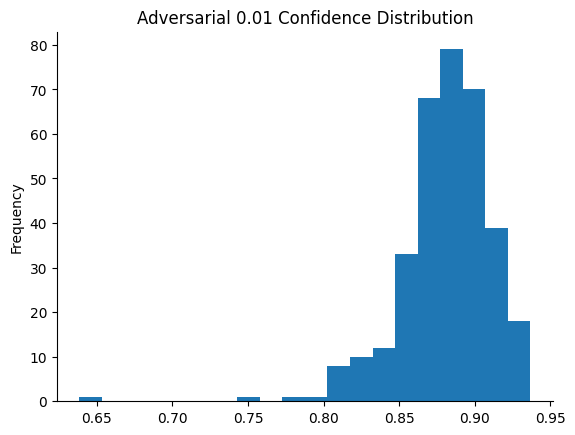

In [111]:
df = pd.DataFrame(adversarial_0_01_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.01 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

******************************************

In [117]:
# @title Adversarial Images 0.03
adversarial_0_03_all = rows
print(len(adversarial_0_03_all))

341


In [122]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_03_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_03_all:
  confidence = result['confidence']
  adversarial_0_03_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_03_conf_avg = sum(adversarial_0_03_conf) / len(adversarial_0_03_conf)
adversarial_0_03_accuracy = faces_count / total_images

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.03 confidence:  ", adversarial_0_03_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.03 Accuracy: ",adversarial_0_03_accuracy )

Total number of images in folder:  341
Number of images with faces detected:  341
Number of images without faces detected:  0
Average Adversarial 0.03 confidence:   0.8752944743877982
Number of images with detected faces with confidence > 0.7:   340
Adversarial 0.03 Accuracy:  1.0


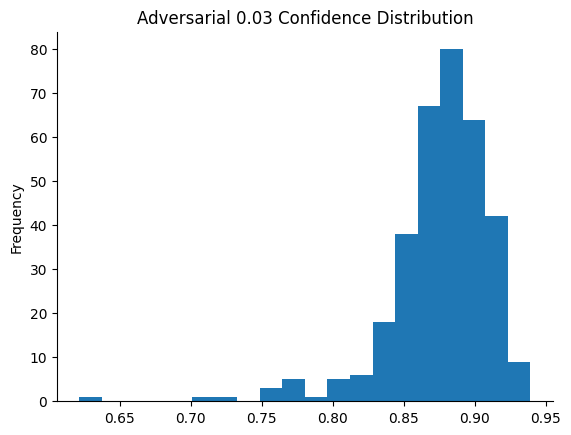

In [124]:
df = pd.DataFrame(adversarial_0_03_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.03 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

******************************************

In [128]:
# @title Adversarial Images 0.06
adversarial_0_06_all = rows
print(len(adversarial_0_06_all))

341


In [131]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_06_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_06_all:
  confidence = result['confidence']
  adversarial_0_06_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_06_conf_avg = sum(adversarial_0_06_conf) / len(adversarial_0_06_conf)
adversarial_0_06_accuracy = faces_count / total_images

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.06 confidence:  ", adversarial_0_06_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.06 Accuracy: ",adversarial_0_06_accuracy )

Total number of images in folder:  341
Number of images with faces detected:  338
Number of images without faces detected:  3
Average Adversarial 0.06 confidence:   0.8242309677286231
Number of images with detected faces with confidence > 0.7:   313
Adversarial 0.06 Accuracy:  0.9912023460410557


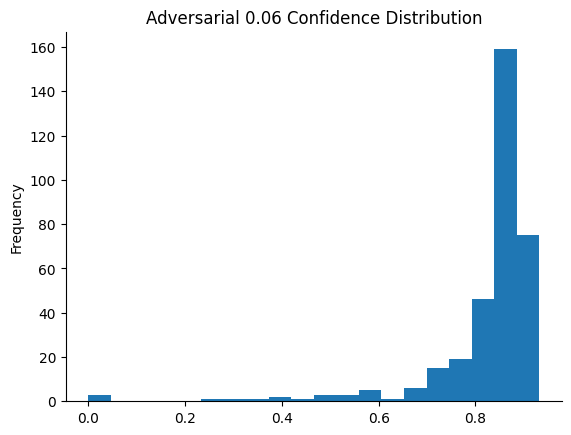

In [134]:
df = pd.DataFrame(adversarial_0_06_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.06 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

***********************************************

In [147]:
# @title Adversarial Images 0.09
adversarial_0_09_all = rows
print(len(adversarial_0_09_all))

341


In [149]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_09_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_09_all:
  confidence = result['confidence']
  adversarial_0_09_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_09_conf_avg = sum(adversarial_0_09_conf) / len(adversarial_0_09_conf)
adversarial_0_09_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.09 confidence:  ", adversarial_0_09_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.09 Accuracy: ",adversarial_0_09_accuracy )

0.844574780058651
Total number of images in folder:  341
Number of images with faces detected:  288
Number of images without faces detected:  53
Average Adversarial 0.09 confidence:   0.6298269499257163
Number of images with detected faces with confidence > 0.7:   218
Adversarial 0.09 Accuracy:  0.844574780058651


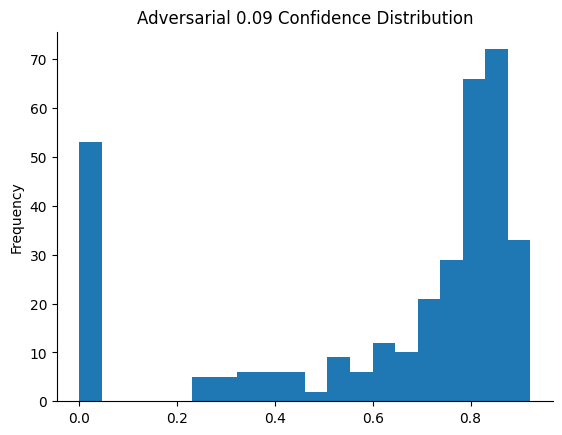

In [150]:
df = pd.DataFrame(adversarial_0_09_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.09 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [154]:
# @title Adversarial Images 0.13
adversarial_0_13_all = rows
print(len(adversarial_0_13_all))

341


In [155]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_13_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_13_all:
  confidence = result['confidence']
  adversarial_0_13_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_13_conf_avg = sum(adversarial_0_13_conf) / len(adversarial_0_13_conf)
adversarial_0_13_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.13 confidence:  ", adversarial_0_13_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.13 Accuracy: ",adversarial_0_13_accuracy )

0.2434017595307918
Total number of images in folder:  341
Number of images with faces detected:  83
Number of images without faces detected:  258
Average Adversarial 0.13 confidence:   0.126485443097755
Number of images with detected faces with confidence > 0.7:   12
Adversarial 0.13 Accuracy:  0.2434017595307918


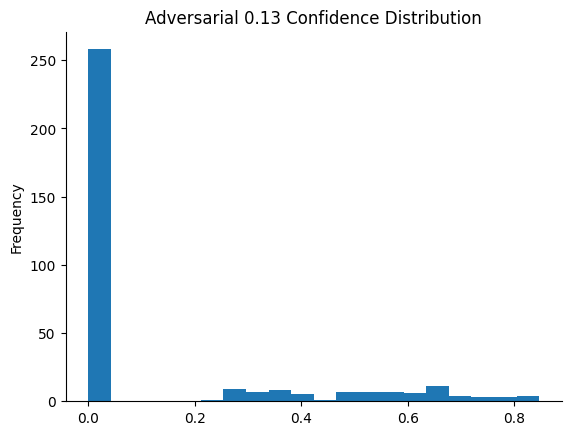

In [156]:
df = pd.DataFrame(adversarial_0_13_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.13 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [16]:
# @title Adversarial Images 0.16
adversarial_0_16_all = rows
print(len(adversarial_0_16_all))

341


In [17]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_16_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_16_all:
  confidence = result['confidence']
  adversarial_0_16_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_16_conf_avg = sum(adversarial_0_16_conf) / len(adversarial_0_16_conf)
adversarial_0_16_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.16 confidence:  ", adversarial_0_16_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.16 Accuracy: ",adversarial_0_16_accuracy )

0.02346041055718475
Total number of images in folder:  341
Number of images with faces detected:  8
Number of images without faces detected:  333
Average Adversarial 0.16 confidence:   0.00910414121717302
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.16 Accuracy:  0.02346041055718475


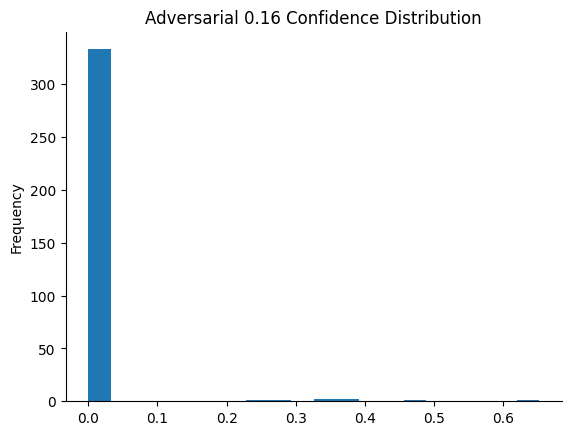

In [29]:
df = pd.DataFrame(adversarial_0_16_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.16 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [22]:
# @title Adversarial Images 0.2
adversarial_0_2_all = rows
print(len(adversarial_0_2_all))

341


In [23]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_2_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_2_all:
  confidence = result['confidence']
  adversarial_0_2_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_2_conf_avg = sum(adversarial_0_2_conf) / len(adversarial_0_2_conf)
adversarial_0_2_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.2 confidence:  ", adversarial_0_2_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.2 Accuracy: ",adversarial_0_2_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.2 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.2 Accuracy:  0.0


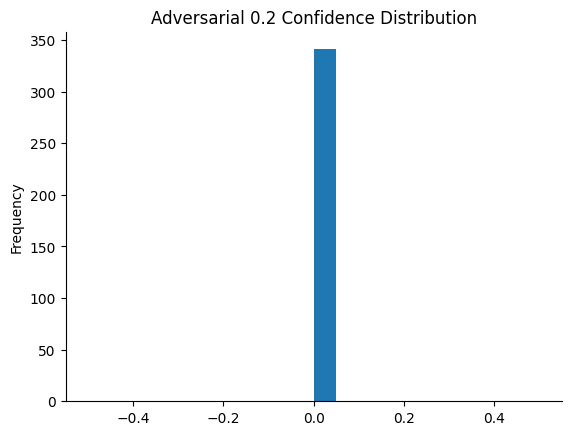

In [30]:
df = pd.DataFrame(adversarial_0_2_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.2 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [31]:
# @title Adversarial Images 0.25
adversarial_0_25_all = rows
print(len(adversarial_0_25_all))

341


In [32]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_25_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_25_all:
  confidence = result['confidence']
  adversarial_0_25_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_25_conf_avg = sum(adversarial_0_25_conf) / len(adversarial_0_25_conf)
adversarial_0_25_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.25 confidence:  ", adversarial_0_25_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.25 Accuracy: ",adversarial_0_25_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.25 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.25 Accuracy:  0.0


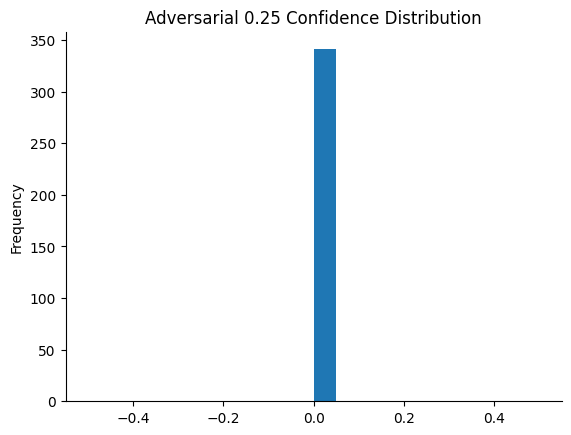

In [33]:
df = pd.DataFrame(adversarial_0_25_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.25 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [37]:
# @title Adversarial Images 0.3
adversarial_0_3_all = rows
print(len(adversarial_0_3_all))

341


In [38]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_3_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_3_all:
  confidence = result['confidence']
  adversarial_0_3_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_3_conf_avg = sum(adversarial_0_3_conf) / len(adversarial_0_3_conf)
adversarial_0_3_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.3 confidence:  ", adversarial_0_3_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.3 Accuracy: ",adversarial_0_3_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.3 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.3 Accuracy:  0.0


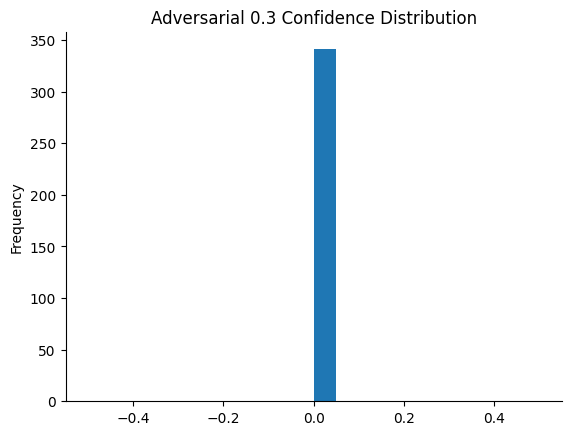

In [40]:
df = pd.DataFrame(adversarial_0_3_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.3 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [44]:
# @title Adversarial Images 0.35
adversarial_0_35_all = rows
print(len(adversarial_0_35_all))

341


In [45]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_35_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_35_all:
  confidence = result['confidence']
  adversarial_0_35_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_35_conf_avg = sum(adversarial_0_35_conf) / len(adversarial_0_35_conf)
adversarial_0_35_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.35 confidence:  ", adversarial_0_35_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.35 Accuracy: ",adversarial_0_35_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.35 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.35 Accuracy:  0.0


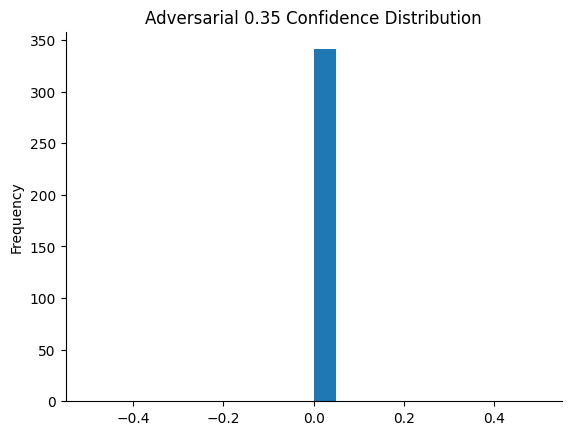

In [46]:
df = pd.DataFrame(adversarial_0_35_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.35 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [50]:
# @title Adversarial Images 0.4
adversarial_0_4_all = rows
print(len(adversarial_0_4_all))

341


In [51]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_4_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_4_all:
  confidence = result['confidence']
  adversarial_0_4_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_4_conf_avg = sum(adversarial_0_4_conf) / len(adversarial_0_4_conf)
adversarial_0_4_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.4 confidence:  ", adversarial_0_4_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.4 Accuracy: ",adversarial_0_4_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.4 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.4 Accuracy:  0.0


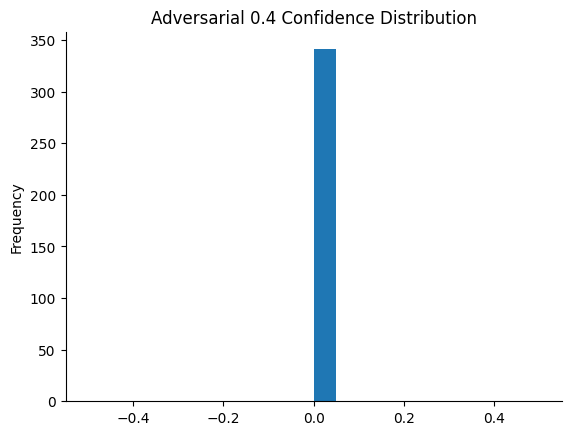

In [52]:
df = pd.DataFrame(adversarial_0_4_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.4 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [56]:
# @title Adversarial Images 0.45
adversarial_0_45_all = rows
print(len(adversarial_0_45_all))

341


In [57]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_45_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_45_all:
  confidence = result['confidence']
  adversarial_0_45_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_45_conf_avg = sum(adversarial_0_4_conf) / len(adversarial_0_45_conf)
adversarial_0_45_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.45 confidence:  ", adversarial_0_45_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.45 Accuracy: ",adversarial_0_45_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.45 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.45 Accuracy:  0.0


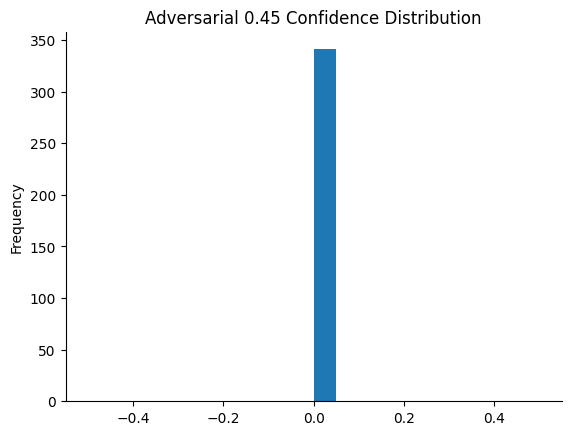

In [59]:
df = pd.DataFrame(adversarial_0_45_all)
from matplotlib import pyplot as plt
df['confidence'].plot(kind='hist', bins=20, title='Adversarial 0.45 Confidence Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

*****************************************************************

In [63]:
# @title Adversarial Images 0.5
adversarial_0_5_all = rows
print(len(adversarial_0_5_all))

341


In [64]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_5_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_5_all:
  confidence = result['confidence']
  adversarial_0_5_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_5_conf_avg = sum(adversarial_0_5_conf) / len(adversarial_0_5_conf)
adversarial_0_5_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.5 confidence:  ", adversarial_0_5_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.5 Accuracy: ",adversarial_0_5_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.5 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.5 Accuracy:  0.0


*****************************************************************

In [68]:
# @title Adversarial Images 0.6
adversarial_0_6_all = rows
print(len(adversarial_0_6_all))

341


In [69]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_6_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_6_all:
  confidence = result['confidence']
  adversarial_0_6_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_6_conf_avg = sum(adversarial_0_6_conf) / len(adversarial_0_6_conf)
adversarial_0_6_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.6 confidence:  ", adversarial_0_6_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.6 Accuracy: ",adversarial_0_6_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.6 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.6 Accuracy:  0.0


*****************************************************************

In [74]:
# @title Adversarial Images 0.8
adversarial_0_8_all = rows
print(len(adversarial_0_8_all))

341


In [80]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_8_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_8_all:
  confidence = result['confidence']
  adversarial_0_8_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_8_conf_avg = sum(adversarial_0_8_conf) / len(adversarial_0_8_conf)
adversarial_0_8_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.8 confidence:  ", adversarial_0_8_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.8 Accuracy: ",adversarial_0_8_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.8 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.8 Accuracy:  0.0


*****************************************************************

In [79]:
# @title Adversarial Images 0.95
adversarial_0_95_all = rows
print(len(adversarial_0_95_all))

341


In [81]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_0_95_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_0_95_all:
  confidence = result['confidence']
  adversarial_0_95_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_0_95_conf_avg = sum(adversarial_0_95_conf) / len(adversarial_0_95_conf)
adversarial_0_95_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 0.95 confidence:  ", adversarial_0_95_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 0.95 Accuracy: ",adversarial_0_95_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 0.95 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 0.95 Accuracy:  0.0


*****************************************************************

In [85]:
# @title Adversarial Images 1.0
adversarial_1_0_all = rows
print(len(adversarial_1_0_all))

341


In [86]:
#adversarial_0_03_all = rows
#print(len(adversarial_0_03_all))

adversarial_1_0_conf = []
high_conf_count = 0
no_faces_count = 0
faces_count = 0

for result in adversarial_1_0_all:
  confidence = result['confidence']
  adversarial_1_0_conf.append(confidence)
  label = result['label']
  if confidence > 0.7:
    high_conf_count += 1
  if label == 'no_face':
    no_faces_count += 1
  if label =='faces':
    faces_count += 1


adversarial_1_0_conf_avg = sum(adversarial_1_0_conf) / len(adversarial_1_0_conf)
adversarial_1_0_accuracy = faces_count / total_images
checker = (total_images - no_faces_count)/total_images
print(checker)

print("Total number of images in folder: ", total_images)
print("Number of images with faces detected: ", faces_count)
print("Number of images without faces detected: ", no_faces_count)
print("Average Adversarial 1.0 confidence:  ", adversarial_1_0_conf_avg)
print("Number of images with detected faces with confidence > 0.7:  ",high_conf_count)
print("Adversarial 1.0 Accuracy: ",adversarial_1_0_accuracy )

0.0
Total number of images in folder:  341
Number of images with faces detected:  0
Number of images without faces detected:  341
Average Adversarial 1.0 confidence:   0.0
Number of images with detected faces with confidence > 0.7:   0
Adversarial 1.0 Accuracy:  0.0


*****************************************************************

In [ ]:
# @title Final Stats plot

In [14]:
"""
stats_confidences = []
stats_confidences.append(0.8833914557497248) #cleaned human faces
stats_confidences.append(0.04197597035242919) #cleaned non human faces
stats_confidences.append(0.8807596905140583) #adversarial 0.01
stats_confidences.append(0.8752944743877982) #adversarial 0.03
stats_confidences.append(0.8242309677286231) #adversarial 0.06
stats_confidences.append(0.6298269499257163) #adversarial 0.09
stats_confidences.append(0.126485443097755) #adversarial 0.13
stats_confidences.append(adversarial_0_16_conf_avg)
stats_confidences.append(adversarial_0_2_conf_avg)
stats_confidences.append(adversarial_0_25_conf_avg)
stats_confidences.append(adversarial_0_3_conf_avg)
stats_confidences.append(adversarial_0_35_conf_avg)
stats_confidences.append(adversarial_0_4_conf_avg)
stats_confidences.append(adversarial_0_45_conf_avg)
stats_confidences.append(adversarial_0_5_conf_avg)
stats_confidences.append(adversarial_0_6_conf_avg)
stats_confidences.append(adversarial_0_8_conf_avg)
stats_confidences.append(adversarial_0_95_conf_avg)
stats_confidences.append(adversarial_1_0_conf_avg)
print(len(stats_confidences))
"""
stats_accuracies = []
#stats_accuracies.append(0.09339407744874716) #non human faces, faces accuracy
stats_accuracies.append(0.9066059225512528) #non human faces , no face accuracy
stats_accuracies.append(1.0) #cleaned human faces
stats_accuracies.append(1.0) #adversarial 0.01
stats_accuracies.append(1.0) #adversarial 0.03
stats_accuracies.append(0.9912023460410557)  #adversarial 0.06
stats_accuracies.append(0.844574780058651) #adversarial 0.09
stats_accuracies.append(0.2434017595307918) #adversarial 0.13
stats_accuracies.append(0.02346041055718475) #adversarial_0_16_accuracy
stats_accuracies.append(0.0) #adversarial_0_2_accuracy
stats_accuracies.append(0.0) #adversarial_0_25_accuracy
stats_accuracies.append(0.0) #adversarial_0_3_accuracy
stats_accuracies.append(0.0) #adversarial_0_35_accuracy
stats_accuracies.append(0.0) #adversarial_0_4_accuracy
stats_accuracies.append(0.0) #adversarial_0_45_accuracy
stats_accuracies.append(0.0) #adversarial_0_5_accuracy
stats_accuracies.append(0.0) #adversarial_0_6_accuracy
stats_accuracies.append(0.0) #adversarial_0_8_accuracy
stats_accuracies.append(0.0) #adversarial_0_95_accuracy
stats_accuracies.append(0.0) #adversarial_1_0_accuracy
print(len(stats_accuracies))

19


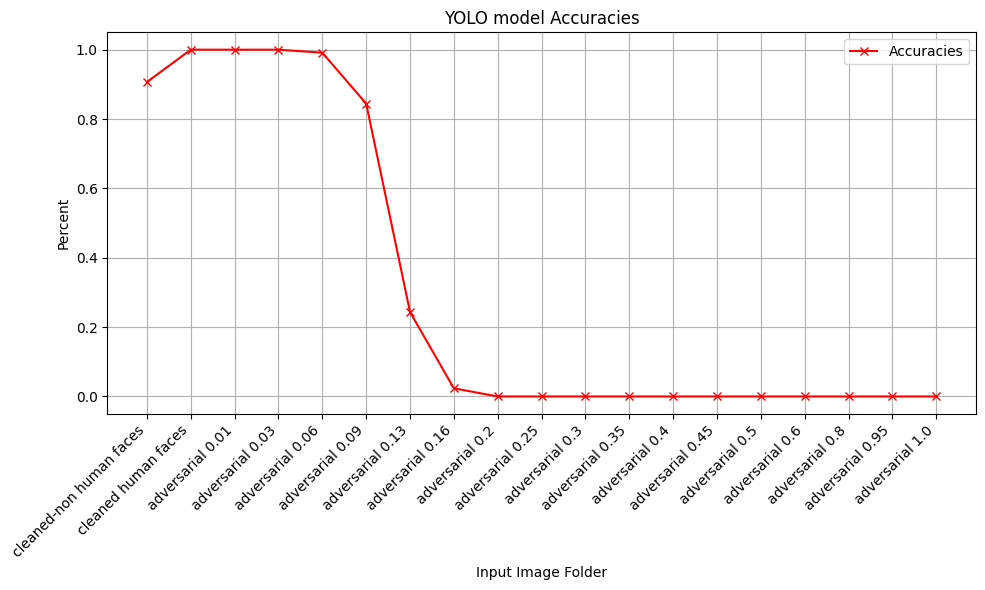

In [16]:
import matplotlib.pyplot as plt

#labels for the x-axis
labels = [
    'cleaned-non human faces',
    'cleaned human faces',
    'adversarial 0.01',
    'adversarial 0.03',
    'adversarial 0.06',
    'adversarial 0.09',
    'adversarial 0.13',
    'adversarial 0.16',
    'adversarial 0.2',
    'adversarial 0.25',
    'adversarial 0.3',
    'adversarial 0.35',
    'adversarial 0.4',
    'adversarial 0.45',
    'adversarial 0.5',
    'adversarial 0.6',
    'adversarial 0.8',
    'adversarial 0.95',
    'adversarial 1.0'
]

# Plotting the data
plt.figure(figsize=(10, 6))

#plt.plot(labels, stats_confidences, marker='o', label='Confidence Scores', color='b')
plt.plot(labels, stats_accuracies, marker='x', label='Accuracies', color='r')

plt.xlabel('Input Image Folder')
plt.ylabel('Percent')
plt.title('YOLO model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()